**<div align="center">MACHINE LEARNING ASSESSMENT</div>**

**<div align="center">TAWAKALIT AGBOOLA<br>
STUDENT ID: 23653040</div>**

# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset'
car = pd.read_csv('adverts.csv')
car.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [3]:
# Display a sample of observations
sample_car = car.sample(n=5, random_state=42)
sample_car

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
332044,202010074692259,2826.0,69,Silver,Volkswagen,Sharan,USED,2019.0,23000,MPV,False,Diesel
173955,202009023198786,10601.0,19,Red,Nissan,Qashqai,USED,2019.0,16000,SUV,False,Petrol
367464,202007221569681,23000.0,58,Silver,Honda,Jazz,USED,2008.0,4799,Hatchback,False,Petrol
47695,202009113590641,9419.0,17,Silver,Volkswagen,Polo,USED,2017.0,11000,Hatchback,False,Petrol
210184,202010195186332,113250.0,16,Grey,Vauxhall,Insignia,USED,2016.0,5400,Hatchback,False,Diesel


In [4]:
# Checking the data types of each column
car_data_types = car.dtypes
car_data_types

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


## Identifying the Quantitative (qnf) and Qualitative (qlf) features

In [6]:
qnf = car.select_dtypes(exclude = 'object').columns.tolist()
print('Quantitative Features:',qnf)
print()
qlf = car.select_dtypes(include = 'object').columns.tolist()
print('Qualitative Features:', qlf)

Quantitative Features: ['public_reference', 'mileage', 'year_of_registration', 'price', 'crossover_car_and_van']

Qualitative Features: ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']


# Analysis of Predictive Power of Features

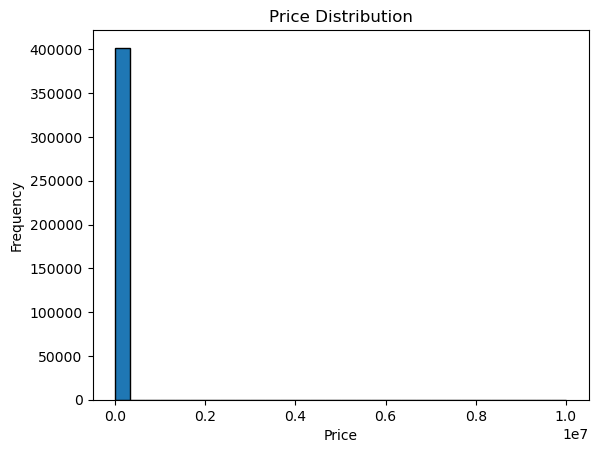

In [7]:
# Histogram for price
plt.hist(car['price'], bins=30, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

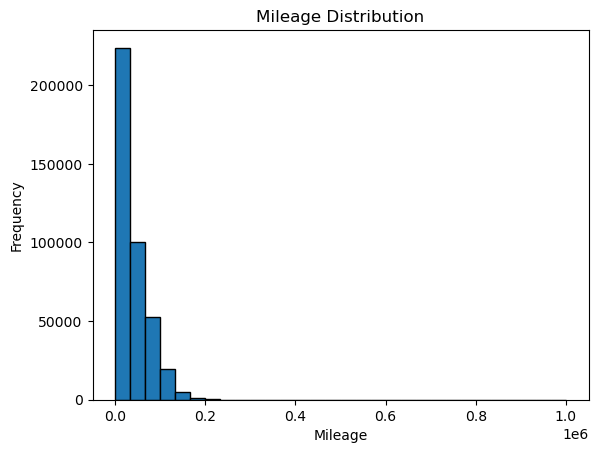

In [8]:
# Histogram for 'price'
plt.hist(car['mileage'], bins=30, edgecolor='black')
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

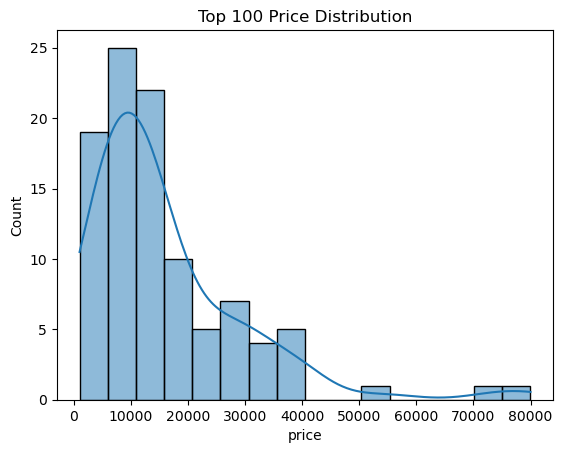

In [9]:
price_1000 = car['price'].head(100)
sns.histplot(price_1000, kde=True)
plt.title('Top 100 Price Distribution')
plt.show()

## Summary Statistics

In [10]:
# checking for summary statistics for numeric features only
summary_stats = car.describe()
summary_stats

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


# DATA PREPROCESSING

In [11]:
car.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

## Handling Missing Values

In [12]:
car['mileage'].fillna(car['mileage'].mean(), inplace=True)
car['reg_code'].fillna(0, inplace=True)
car['standard_colour'].fillna('no_colour', inplace=True)
car['year_of_registration'].fillna(car['year_of_registration'].mode()[0], inplace=True)
car['body_type'].fillna('no_body', inplace=True)
car['fuel_type'].fillna('unknown', inplace=True)

In [13]:
print("Missing Values:")
print(car.isnull().sum())

Missing Values:
public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


In [14]:
car.duplicated().sum()

0

## Handling Outliers

Handling outliers using IQR(Interquatile Range) method 

In [15]:
# from scipy.stats import zscore
# numeric_columns = car.select_dtypes(include=['int64', 'float64']).columns
# print(numeric_columns)
# car = car[(np.abs(zscore(car[numeric_columns])) < 3).all(axis=1)]
# car.info()

In [16]:
# def handle_outliers(car, column):
#     Q1 = car[column].quantile(0.25)
#     Q3 = car[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     car[column] = np.where((car[column] < lower_bound) | (car[column] > upper_bound), car[column].median(), car[column])

In [17]:
# car_numeric = ['mileage', 'year_of_registration', 'price']
# for column in car_numeric:
#     handle_outliers(car, column)

Aftertrying different methods for handling outliers, I realied the best is to set a dynamic threshold for the vehicle condition. Because all the outlier handling methods used above keep dropping the NEW vehicle conditions, which is also a vital feature in our exploration.

## Setting a dynamic threshold for outlier removal 

In [18]:
# Upper threshold for NEW and USED cars
upper_threshold_new = np.percentile(car[car['vehicle_condition'] == 'NEW']['price'], 99)
upper_threshold_used = np.percentile(car[car['vehicle_condition'] == 'USED']['price'], 99)

# Lower threshold for NEW and USED cars (1st percentile)
lower_threshold_new = np.percentile(car[car['vehicle_condition'] == 'NEW']['price'], 1)
lower_threshold_used = np.percentile(car[car['vehicle_condition'] == 'USED']['price'], 1)

car = car[((car['vehicle_condition'] == 'NEW') & (car['price'] >= lower_threshold_new) & (car['price'] <= upper_threshold_new)) |
          ((car['vehicle_condition'] == 'USED') & (car['price'] >= lower_threshold_used) & (car['price'] <= upper_threshold_used))]

In [19]:

threshold_new = np.percentile(car[car['vehicle_condition'] == 'NEW']['price'], 99)
threshold_used = np.percentile(car[car['vehicle_condition'] == 'USED']['price'], 99)

car = car[(car['price'] <= threshold_new) | ((car['vehicle_condition'] == 'USED') & (car['price'] <= threshold_used))]

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393851 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       393851 non-null  int64  
 1   mileage                393851 non-null  float64
 2   reg_code               393851 non-null  object 
 3   standard_colour        393851 non-null  object 
 4   standard_make          393851 non-null  object 
 5   standard_model         393851 non-null  object 
 6   vehicle_condition      393851 non-null  object 
 7   year_of_registration   393851 non-null  float64
 8   price                  393851 non-null  int64  
 9   body_type              393851 non-null  object 
 10  crossover_car_and_van  393851 non-null  bool   
 11  fuel_type              393851 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 36.4+ MB


# EXPLORATORY DATA ANALYSIS

In [21]:
correlation = car.corr()
correlation

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.031285,0.012081,-0.064508,-0.025481
mileage,0.031285,1.000000,-0.365241,-0.482699,0.035980
year_of_registration,0.012081,-0.365241,1.000000,0.219243,-0.012450
price,-0.064508,-0.482699,0.219243,1.000000,0.038349
crossover_car_and_van,-0.025481,0.035980,-0.012450,0.038349,1.000000


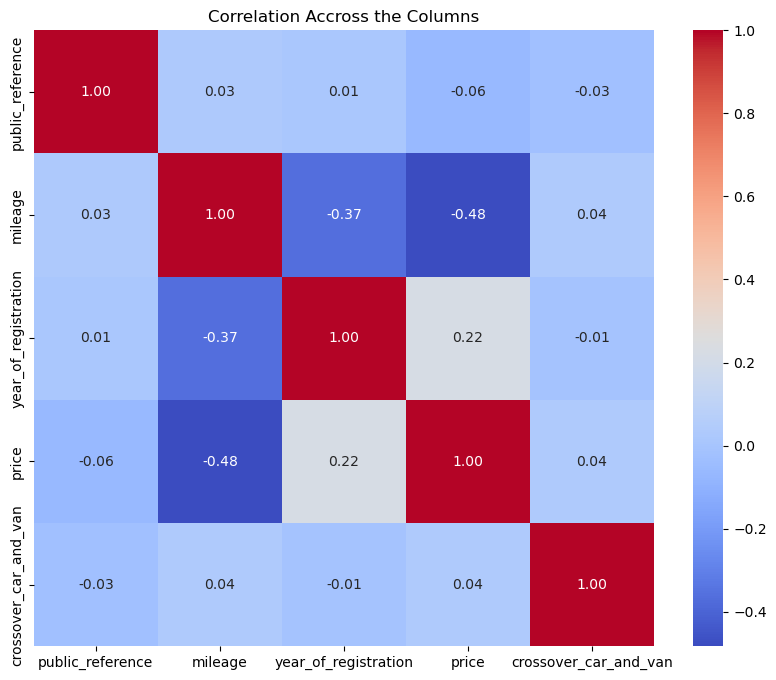

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Accross the Columns")
plt.show()

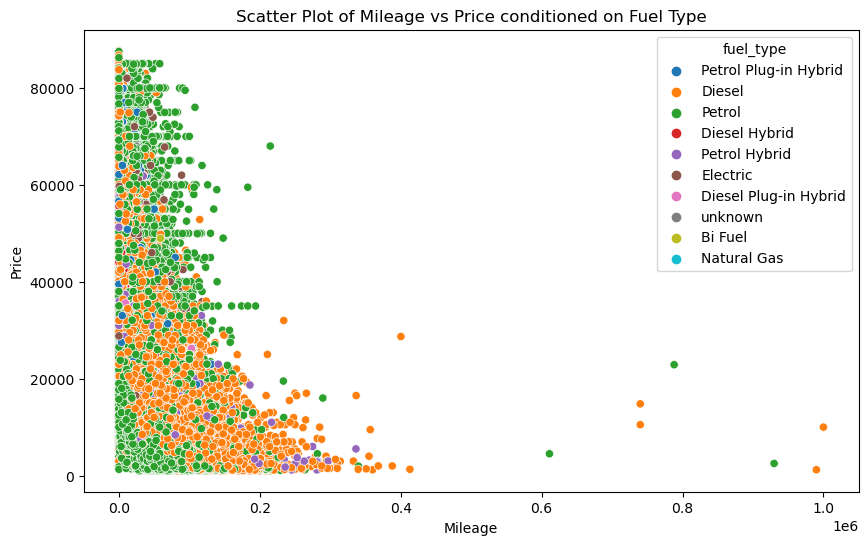

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='mileage', y='price', hue='fuel_type')
plt.title("Scatter Plot of Mileage vs Price conditioned on Fuel Type")
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

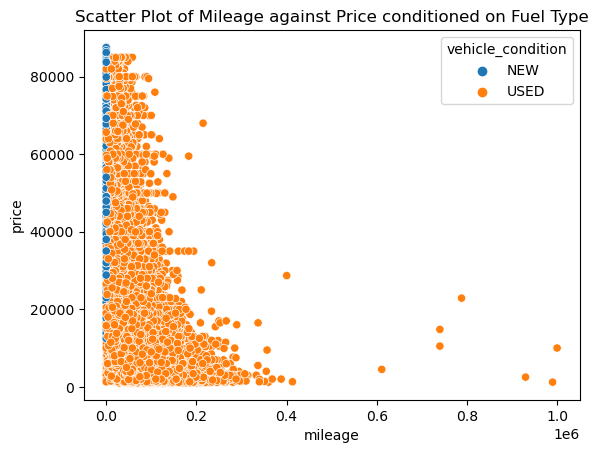

In [24]:
sns.scatterplot(data=car, x='mileage', y='price', hue='vehicle_condition')
plt.title("Scatter Plot of Mileage against Price conditioned on Fuel Type")
plt.show()

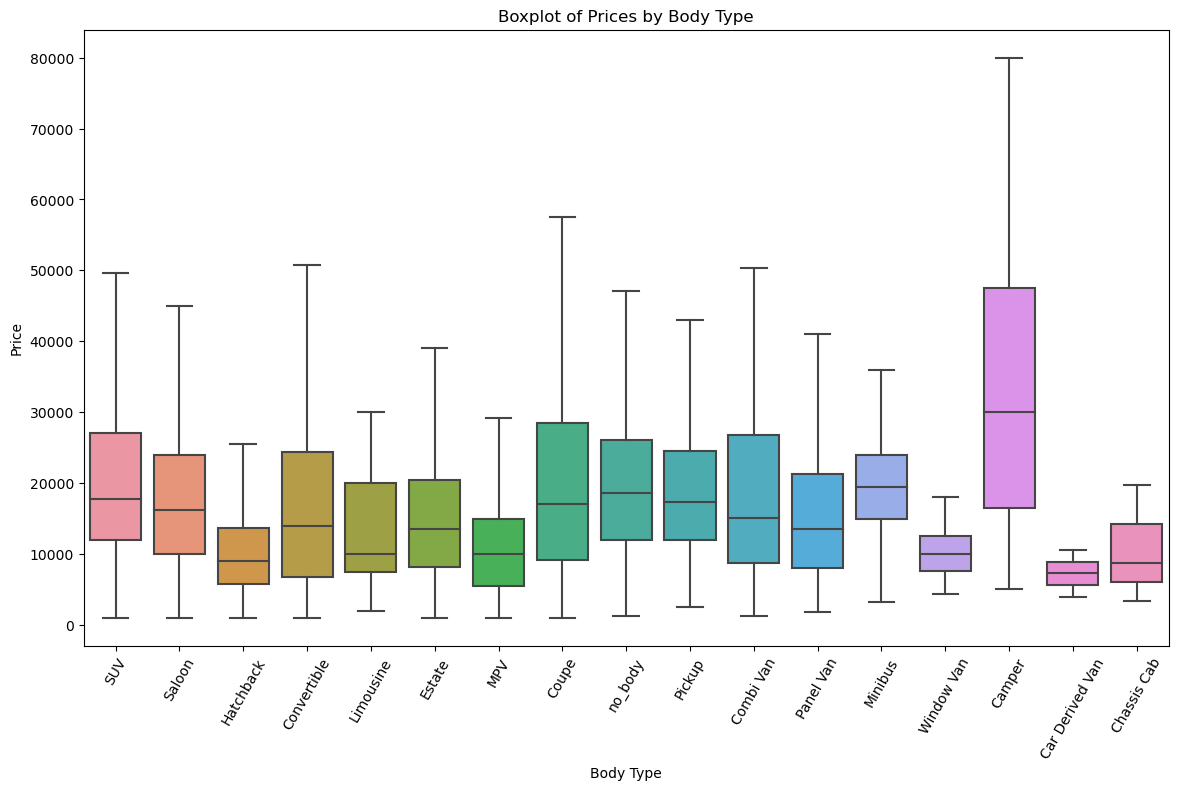

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='body_type', y='price', data=car, showfliers=False)
plt.title('Boxplot of Prices by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=60)
plt.show()

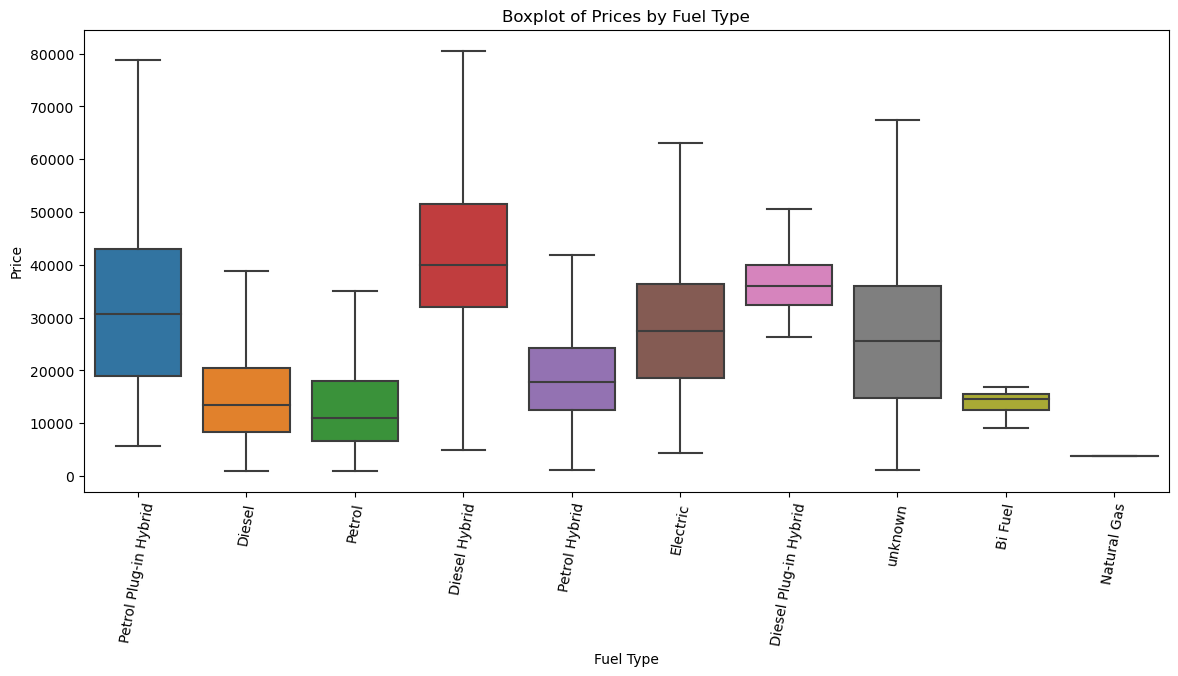

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='fuel_type', y='price', data=car, showfliers=False)
plt.title('Boxplot of Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=80)
plt.show()

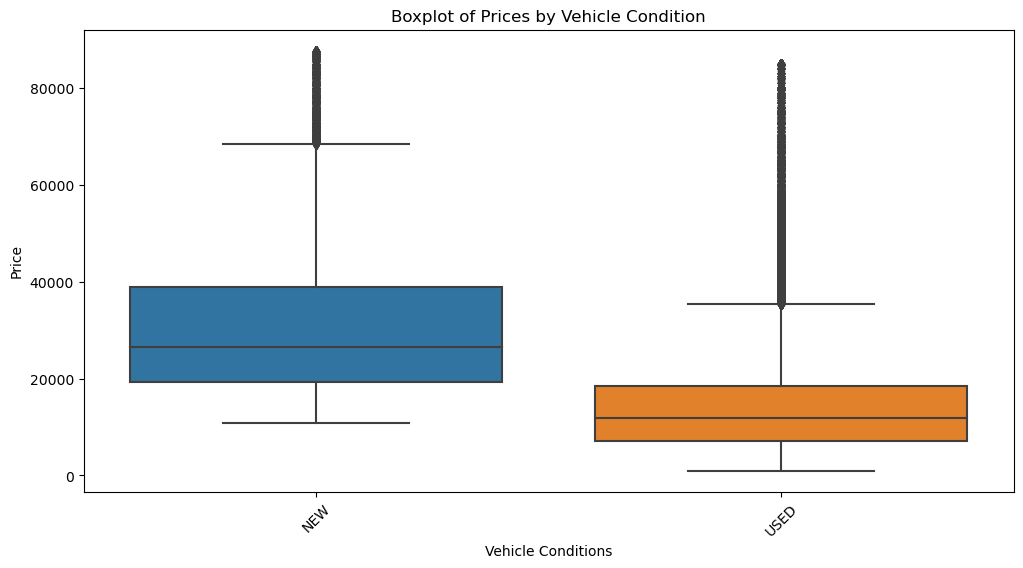

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='vehicle_condition', y='price', data=car)
plt.title('Boxplot of Prices by Vehicle Condition')
plt.xlabel('Vehicle Conditions')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

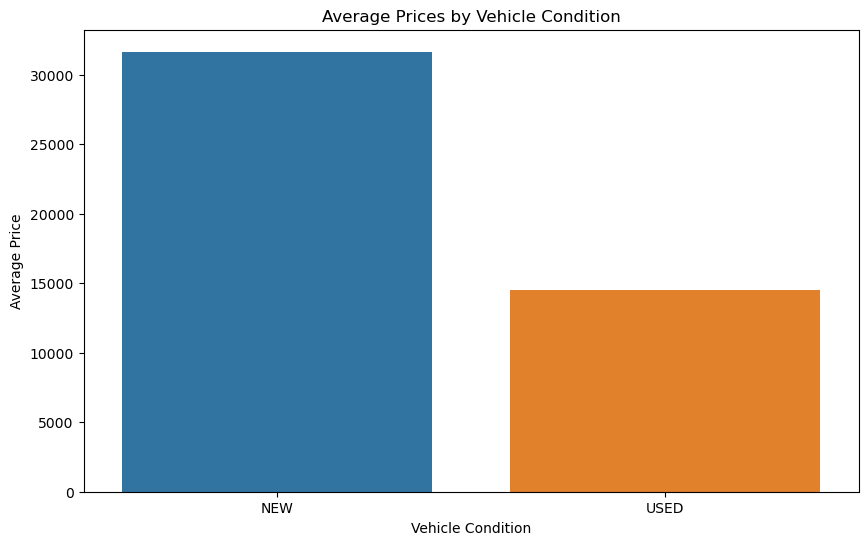

In [28]:
price_by_condition = car.groupby('vehicle_condition')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_condition.index, y=price_by_condition.values)
plt.title('Average Prices by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Price')
plt.show()

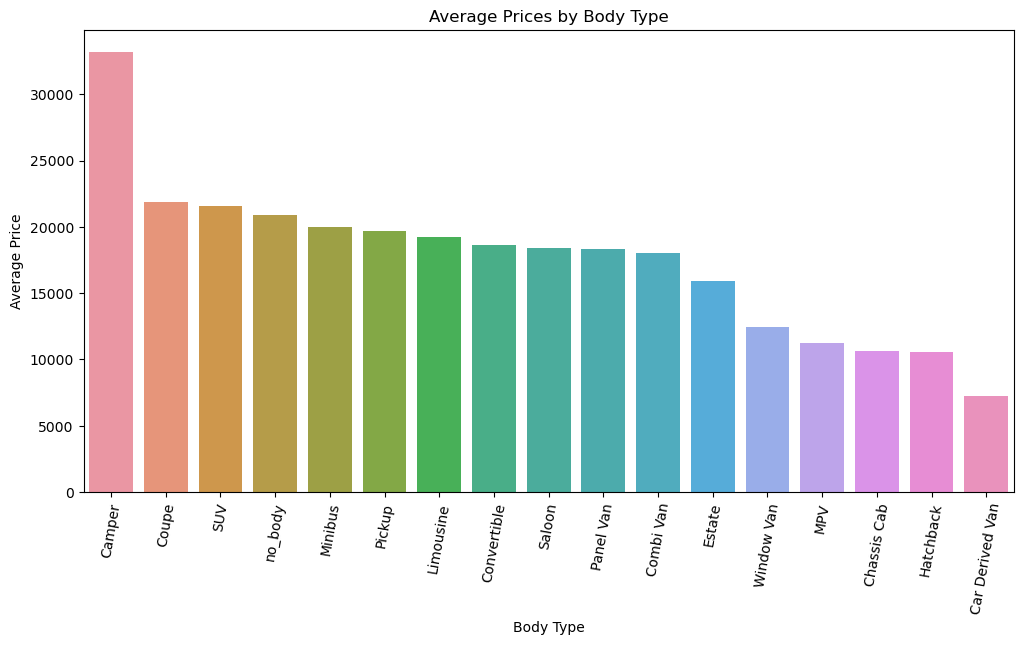

In [29]:
body_type = car.groupby('body_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=body_type.index, y=body_type.values)
plt.title('Average Prices by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.xticks(rotation=80)
plt.show()

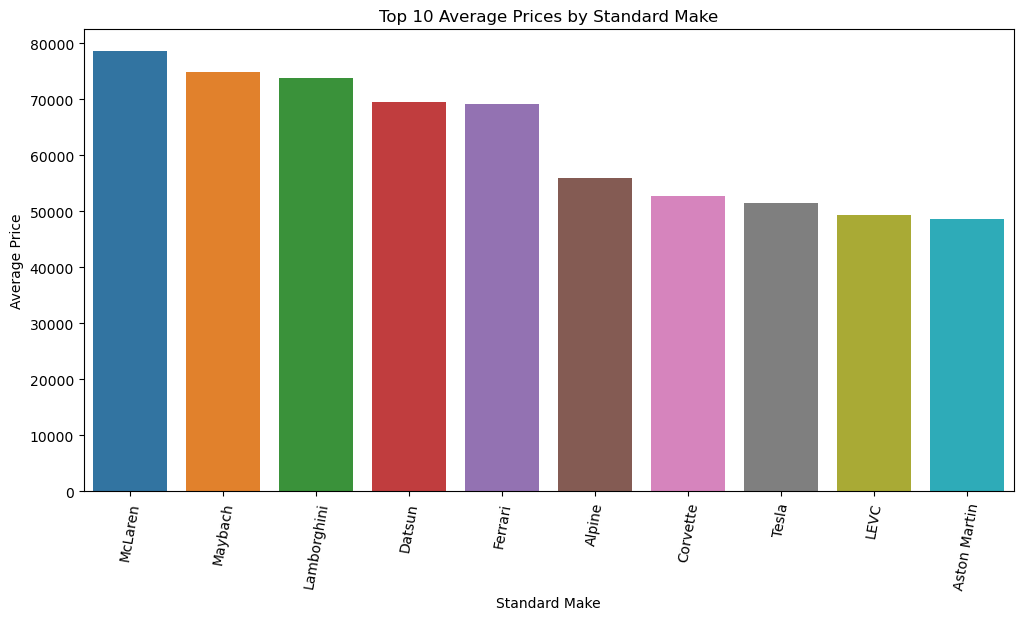

In [30]:
standard_make = car.groupby('standard_make')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=standard_make.index, y=standard_make.values)
plt.title('Top 10 Average Prices by Standard Make')
plt.xlabel('Standard Make')
plt.ylabel('Average Price')
plt.xticks(rotation=80)
plt.show()

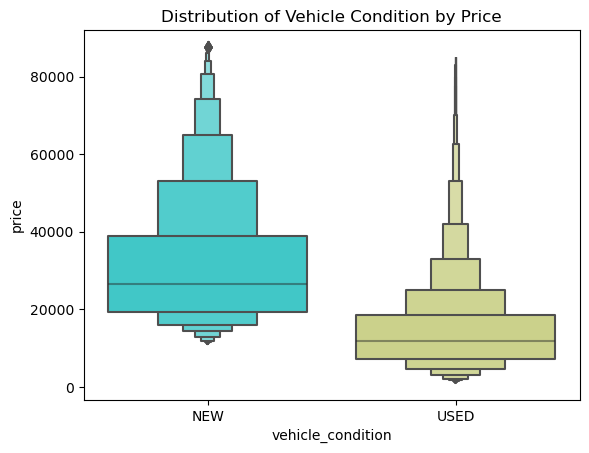

In [31]:
sns.boxenplot(x='vehicle_condition', y='price', data=car, palette='rainbow')
plt.title("Distribution of Vehicle Condition by Price");

# FEATURE ENGINEERING

### Creating a new feature 'vehicle_age'

In [32]:
car['vehicle_age'] = 2024 - car['year_of_registration']
car['vehicle_age'].fillna(car['vehicle_age'].mean(), inplace=True)
car['vehicle_age'].head()

0     7.0
1    13.0
2     7.0
3     8.0
4     9.0
Name: vehicle_age, dtype: float64

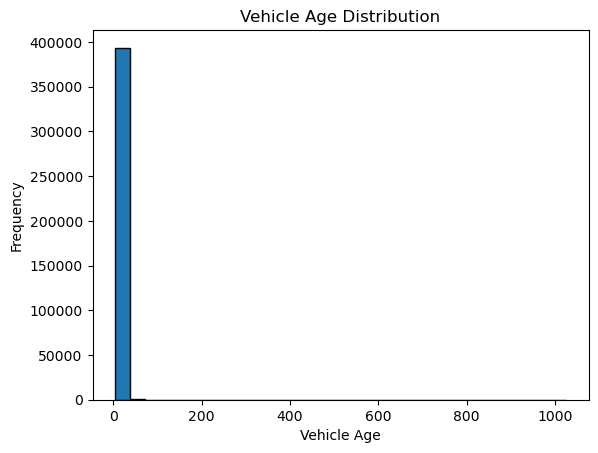

In [33]:
plt.hist(car['vehicle_age'], bins=30, edgecolor='black')
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.show()

### Creating a new feature 'mileage per year'

In [34]:
car['mileage_per_year'] = car['mileage'] / car['vehicle_age']
car['mileage_per_year'].head()

0       0.000000
1    8325.384615
2    1114.285714
3    5625.000000
4    7111.111111
Name: mileage_per_year, dtype: float64

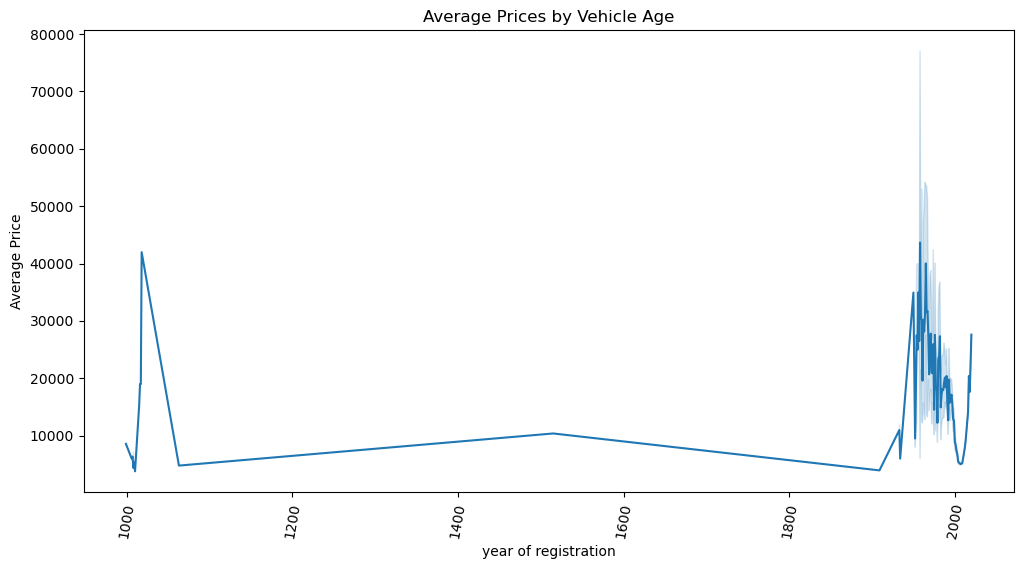

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_of_registration', y='price', data=car)
plt.title('Average Prices by Vehicle Age')
plt.xlabel('year of registration')
plt.ylabel('Average Price')
plt.xticks(rotation=80)
plt.show()

## One-Hot Encoding

In [36]:
# Encoding the categorical variables using one-hot encoder
columns = ['reg_code', 'standard_colour', 'standard_make', 'standard_model','vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type']
car_encoded = pd.get_dummies(car, columns=columns, drop_first=True)

In [37]:
car_encoded.head()

,public_reference,mileage,year_of_registration,price,vehicle_age,mileage_per_year,reg_code_02,reg_code_03,reg_code_04,reg_code_05,...,crossover_car_and_van_True,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Natural Gas,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,fuel_type_unknown
0,202006039777689,0.0,2017.0,73970,7.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,202007020778260,108230.0,2011.0,7000,13.0,8325.384615,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,202007020778474,7800.0,2017.0,14000,7.0,1114.285714,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,202007080986776,45000.0,2016.0,7995,8.0,5625.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,202007161321269,64000.0,2015.0,26995,9.0,7111.111111,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric features
scaler = StandardScaler()
numeric = ['mileage', 'year_of_registration']
car_encoded[numeric] = scaler.fit_transform(car_encoded[numeric])

## Splitting the Data into Features(X) and Target Variable (y)

In [39]:
from sklearn.model_selection import train_test_split

X = car_encoded.drop('price', axis=1)
y = car_encoded['price']

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (275695, 1298)
Validation set size: (59078, 1298)
Test set size: (59078, 1298)


In [40]:
print(f"Training set size: {y_train.shape}")
print(f"Validation set size: {y_val.shape}")
print(f"Test set size: {y_test.shape}")

Training set size: (275695,)
Validation set size: (59078,)
Test set size: (59078,)


# MODEL BUILDING

## Choose Suitable Algorithm(s)

In [41]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
knn_pred = knn_model.predict(X_val)
knn_mse = mean_squared_error(y_val, knn_pred)
knn_r2 = r2_score(y_val, knn_pred)

print(f'Mean Squared Error (kNN): {knn_mse}')
print(f'R Squared (KNN): {knn_r2}')

Mean Squared Error (kNN): 183796125.4013345
R Squared (KNN): -0.16991999992666829


In [43]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
dt_pred = dt_model.predict(X_val)
dt_mse = mean_squared_error(y_val, dt_pred)
dt_r2 = r2_score(y_val, dt_pred)

print(f'Mean Squared Error (Decision Tree): {dt_mse}')
print(f'R Squared (Decision Tree): {dt_r2}')

Mean Squared Error (Decision Tree): 14243793.80080765
R Squared (Decision Tree): 0.9093337837998006


In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
lr_pred = lr_model.predict(X_val)
lr_mse = mean_squared_error(y_val, lr_pred)
lr_r2 = r2_score(y_val, lr_pred)

print(f'Mean Squared Error (Linear Regression): {lr_mse}')
print(f'R Squared (Linear Regression): {lr_r2}')

Mean Squared Error (Linear Regression): 20490559.157138184
R Squared (Linear Regression): 0.8695711625298362


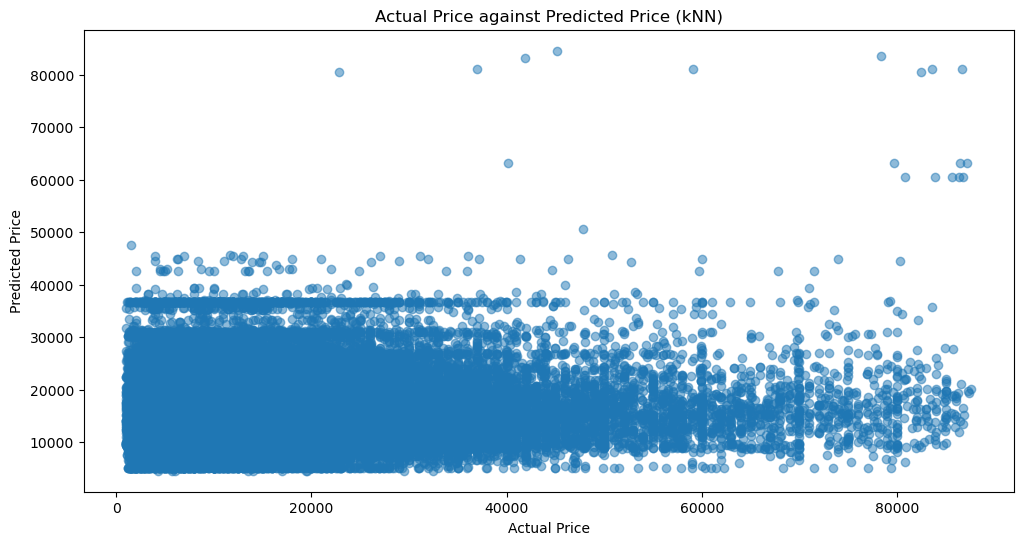

In [47]:
plt.figure(figsize=(12, 6))

plt.scatter(y_val, knn_pred, alpha=0.5)
plt.title('Actual Price against Predicted Price (kNN)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

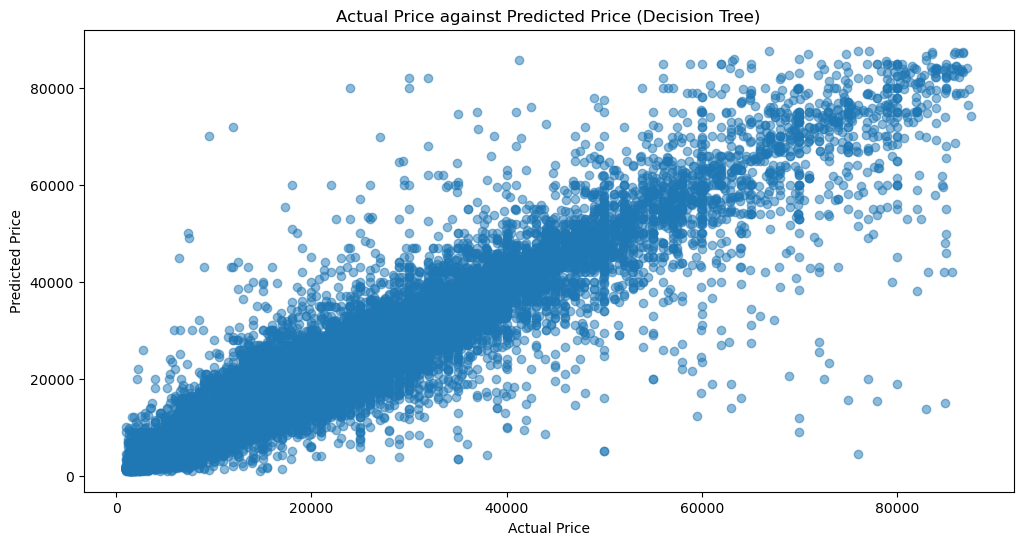

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(y_val, dt_pred, alpha=0.5)
plt.title('Actual Price against Predicted Price (Decision Tree)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

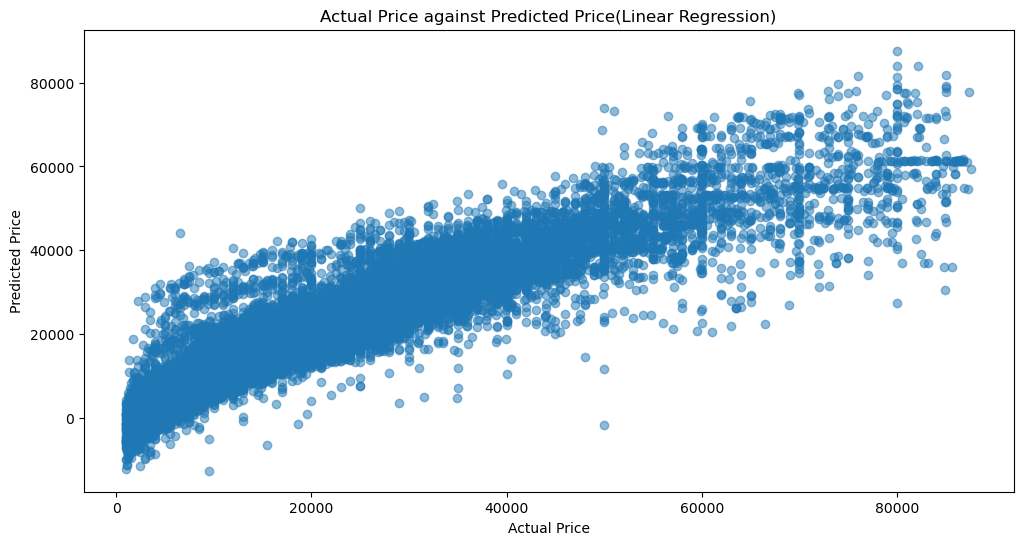

In [49]:
plt.figure(figsize=(12, 6))

plt.scatter(y_val, lr_pred, alpha=0.5)
plt.title('Actual Price against Predicted Price(Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# HYPERPARAMETER TUNING

## GridSearchCV

In [ ]:
# Hyperparameter Tuning for KNN
param_grid = {'n_neighbors': np.arange(1, 31)}
knn_grid = GridSearchCV(knn_model, param_grid, cv=5)
knn_grid.fit(X_val, y_val)

In [57]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("CV Scores for Decision Tree:", cv_scores)

CV Scores for Decision Tree: [-13990571.14437133 -13672421.34501992 -13924647.79432839
 -14209290.63092761 -14319732.38779733]


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'criterion': ['mse', 'friedman_mse'],  
    'max_depth': [None, 10, 20],           
    'min_samples_split': [2, 10],          
    'min_samples_leaf': [1, 4],            
    'max_features': ['auto', 'sqrt']       
}
dt_tuned = DecisionTreeRegressor(random_state=42)

grid_search_dt = GridSearchCV(dt_tuned, param_grid_dt, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   3.2s
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.9s
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.9s
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.6s
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.6s
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   2.4s
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   2.5s
[CV] END criterion=mse, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10; to

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
best_dt_model = grid_search_dt.best_estimator_
dt_pred_tuned = best_dt_model.predict(X_val)
dt_mse_tuned = mean_squared_error(y_val, dt_pred_tuned)

# Output
print(f'Best Decision Tree Model - Mean Squared Error: {dt_mse_tuned}')
print(f'Best Decision Tree Hyperparameters: {grid_search_dt.best_params_}')

Best Decision Tree Model - Mean Squared Error: 20865316.792056903
Best Decision Tree Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [52]:
dt_r2_tuned = r2_score(y_val, dt_pred_tuned)
dt_r2_tuned

0.8671857126121121

In [62]:
cv_scores_tuned = cross_val_score(best_dt_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("CV Scores for Tuned Decision Tree:", cv_scores_tuned)

rmse_scores_tuned = np.sqrt(np.abs(cv_scores_tuned))
print("CV RMSE Scores for Tuned Decision Tree:", rmse_scores_tuned)

CV Scores for Tuned Decision Tree: [-19217948.25755391 -20515651.15017591 -20520269.37860696
 -21859898.6892091  -20992807.65533224]
CV RMSE Scores for Tuned Decision Tree: [4383.82803695 4529.4206197  4529.93039445 4675.45705672 4581.79087861]


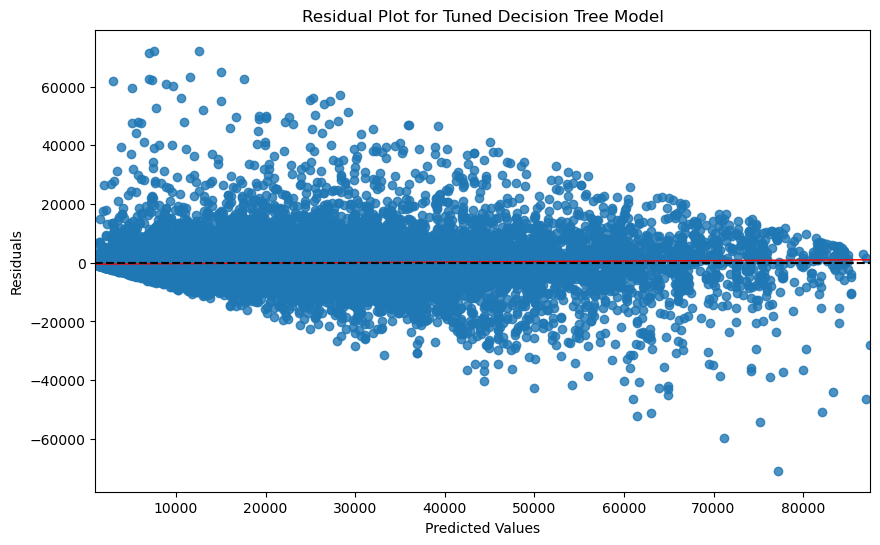

In [58]:
residuals = y_val - dt_pred_tuned

# Creating the residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=dt_pred_tuned, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Tuned Decision Tree Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

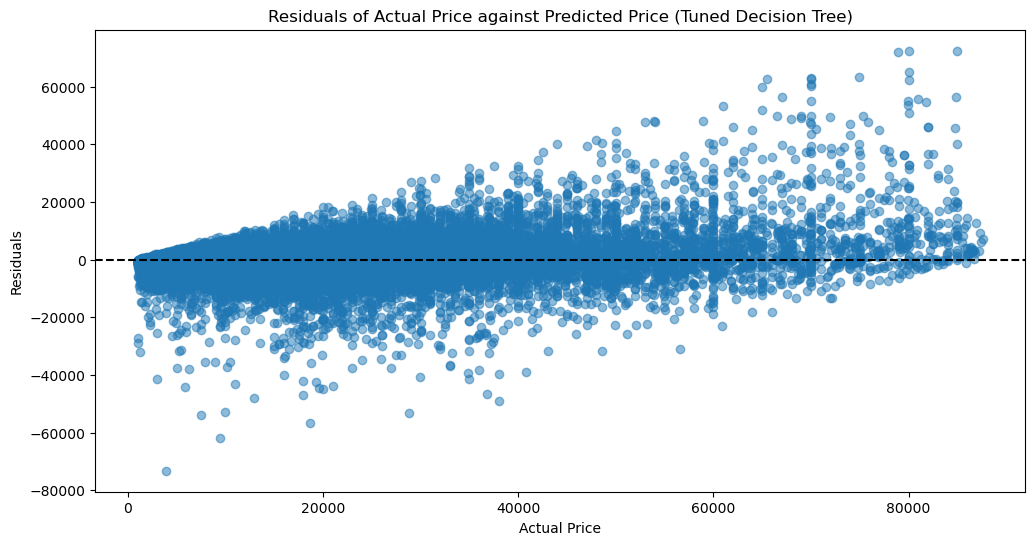

In [63]:
residuals_tuned = y_val - dt_pred_tuned

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_val, residuals_tuned, alpha=0.5)
plt.title('Residuals of Actual Price against Predicted Price (Tuned Decision Tree)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')  
plt.show()

## Extracting feature importances from the Decision Tree model

In [59]:
feature_importances = dt_model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [60]:
feature_importance

,Feature,Importance
1,mileage,0.253864
1278,body_type_Hatchback,0.123485
2,year_of_registration,0.085863
148,standard_make_Land Rover,0.059163
3,vehicle_age,0.026817
...,...,...
646,standard_model_Fluence,0.000000
1048,standard_model_Seville,0.000000
169,standard_make_Panther,0.000000
1044,standard_model_Series I,0.000000


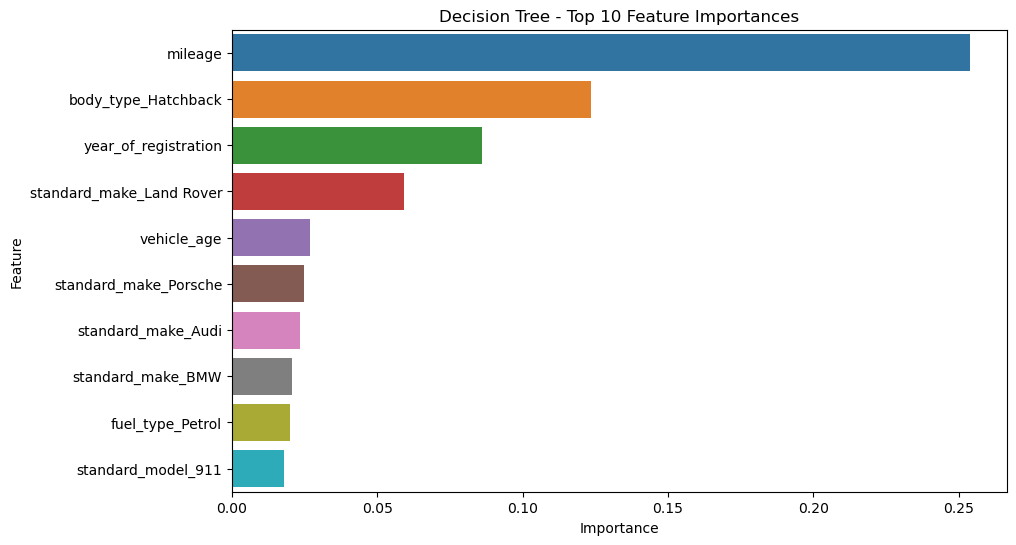

In [61]:
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(top_n))
plt.title(f'Decision Tree - Top {top_n} Feature Importances')
plt.show()